In [3]:
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split


df=pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.keys() 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.shape #total no of rows and column

(1338, 7)

In [8]:
df.head(10) #gives the 1st ten rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [9]:
df.tail(10) #gives the last 10 rows

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [10]:
#Checking for null values in dataframe
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#check the datatype of each column
df.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

from the above datatypes and the columns , there is no need for any change , as the column data and datatype has a match 

In [14]:
df['sex'].nunique()

2

In [15]:
df['children'].nunique()

6

In [16]:
df['smoker'].nunique()

2

In [17]:
df['region'].nunique()

4

In [21]:
#Making dataframe for nominal data--->No order /relationship present (sex,smoker,region,children)
df_visualization_nominal=df[['sex','children','smoker','region']].copy()

In [22]:
df_visualization_nominal.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [23]:
df_visualization_nominal

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


# Visualization of data using seaborn

male      676
female    662
Name: sex, dtype: int64


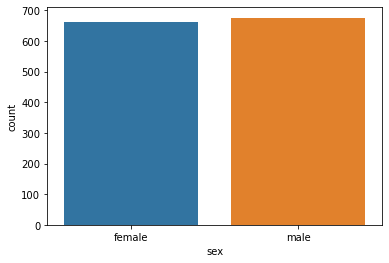

In [24]:
ax=sns.countplot(x='sex',data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

From the above observation the total count of male is 676 and female is 662

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


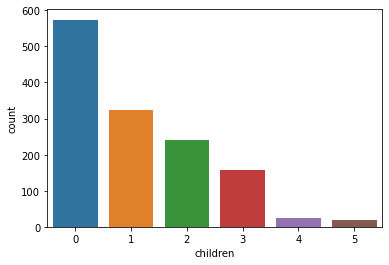

In [25]:
ax=sns.countplot(x='children',data=df_visualization_nominal)
print(df_visualization_nominal['children'].value_counts())

From the above observation the count of (zero) children is 574, with (1) child is 324, with (2) children is 240, with (3) children is 157,with (4) children is 25 and (5) children is 18

no     1064
yes     274
Name: smoker, dtype: int64


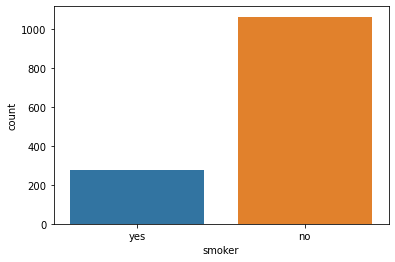

In [26]:
ax=sns.countplot(x='smoker',data=df_visualization_nominal)
print(df_visualization_nominal['smoker'].value_counts())

From the above observation the total no of smokers are 274, where as non smokers are 1064

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


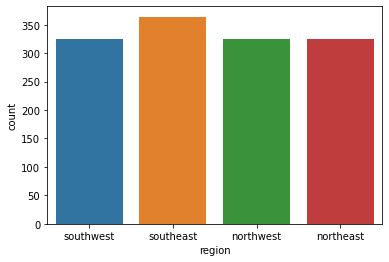

In [27]:
ax=sns.countplot(x='region',data=df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())

From the above observation we can see that the count from region(southeast :364), from region(southwest:325), from region(northwest :325), from region(northeast :324)

# Making dataframe of Ordinal Data

In [28]:
df_visualization_ordinal=df[['age','bmi','charges']].copy()

In [29]:
df_visualization_ordinal

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [30]:
df_visualization_ordinal.columns

Index(['age', 'bmi', 'charges'], dtype='object')

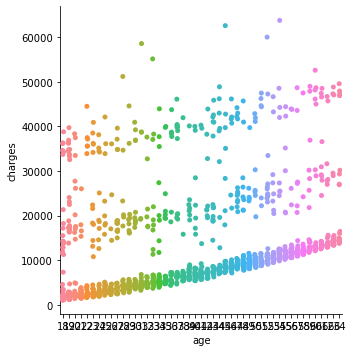

In [31]:
sns.catplot(x='age',y='charges',data=df)

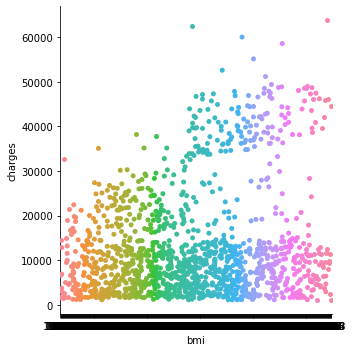

In [32]:
sns.catplot(x='bmi',y='charges',data=df)

In [33]:
#checking the distribution of continous value columns( for datatype=float)
df_visualization_continous=df[['bmi','charges']].copy()

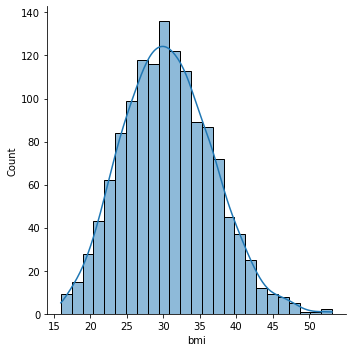

In [35]:
sns.displot(df_visualization_continous['bmi'],kde=True)

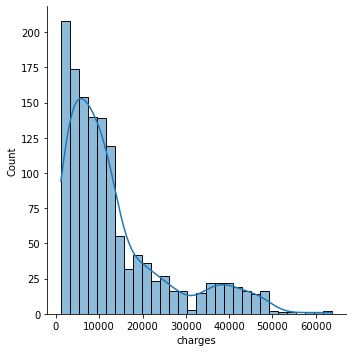

In [36]:
sns.displot(df_visualization_continous['charges'],kde=True)

In [38]:
#Encoding of dataframe: since the dataset has lot of string values, we will use encoding techniques to convert string to numeric
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [44]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [45]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [46]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


From the above descr we can see that some columns  mean < median , it means data is skewed to left

<AxesSubplot:>

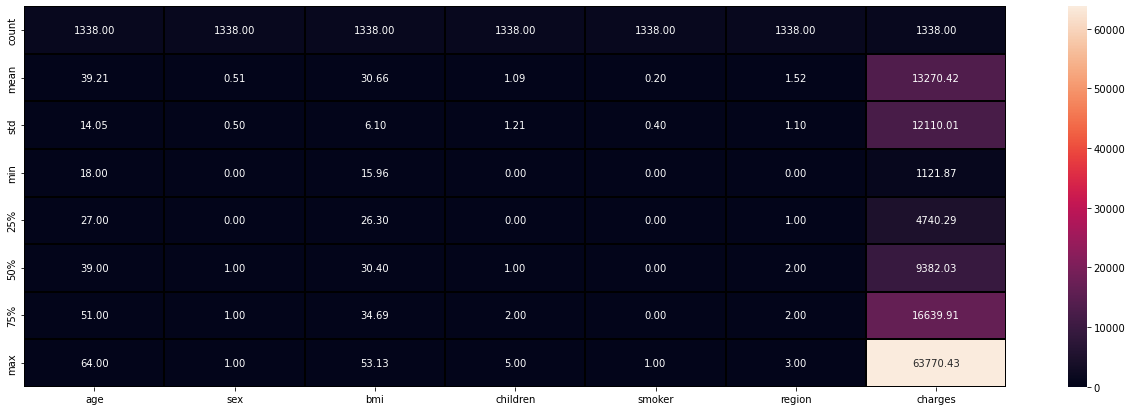

In [47]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [48]:
#corelation of the columns with target column
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [49]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

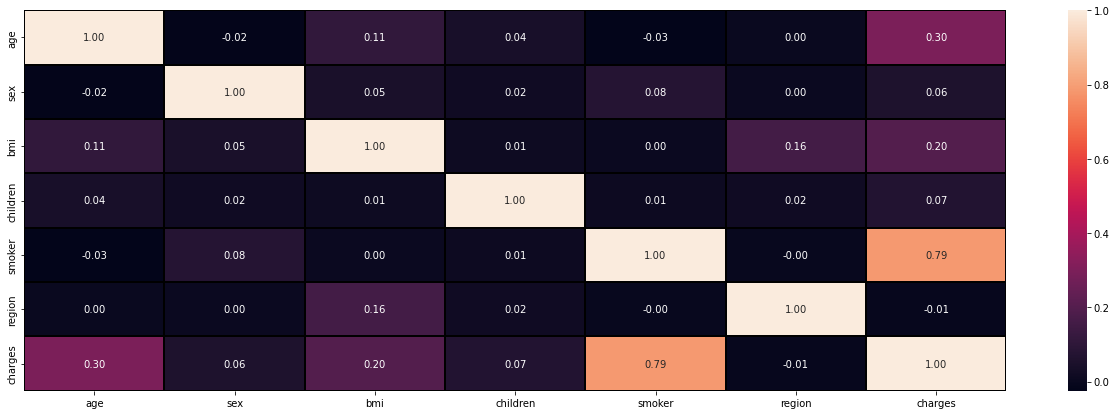

In [50]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

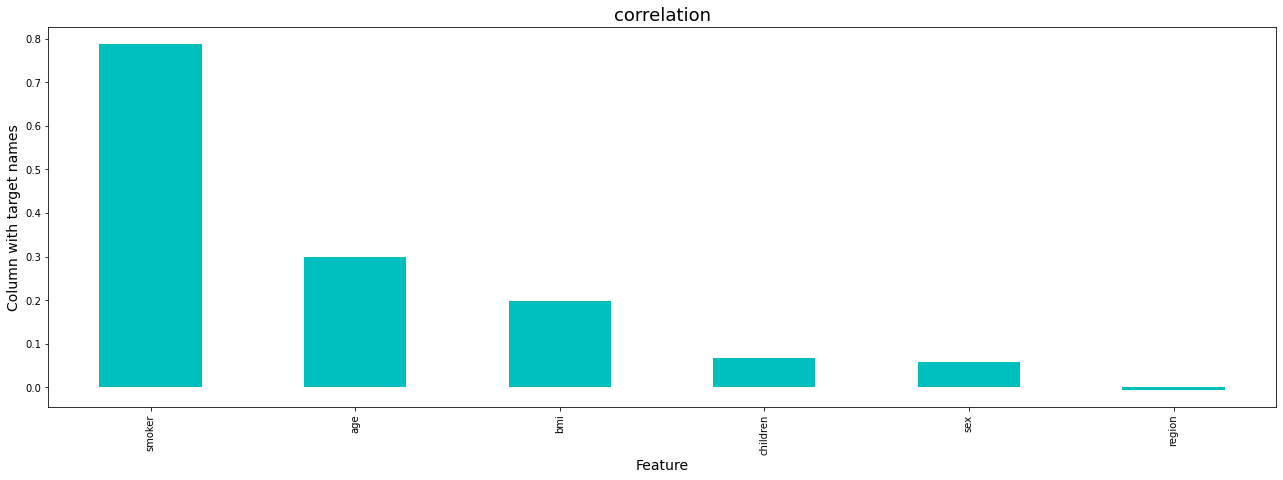

In [52]:
#Checking the columns which are positively and negatively correlated with the target column:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [53]:
#Checking for skewness ( acceptable range : -0.5 to +0.5)
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

On categorical data we do not apply transformations (independent )

In [54]:
#check Outliers
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

<AxesSubplot:>

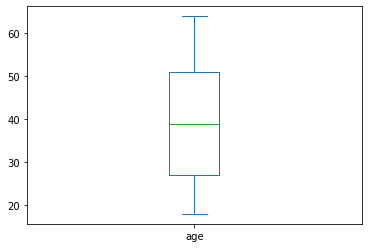

In [55]:
df['age'].plot.box()

<AxesSubplot:>

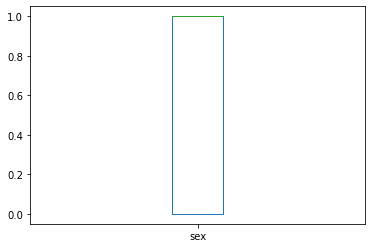

In [56]:
df['sex'].plot.box()

<AxesSubplot:>

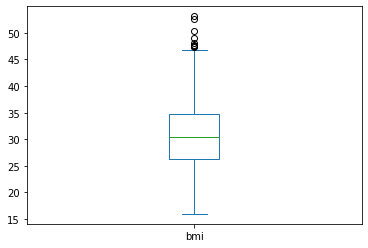

In [57]:
df['bmi'].plot.box()

<AxesSubplot:>

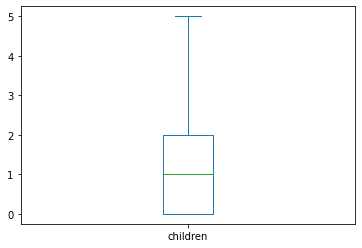

In [58]:
df['children'].plot.box()

<AxesSubplot:>

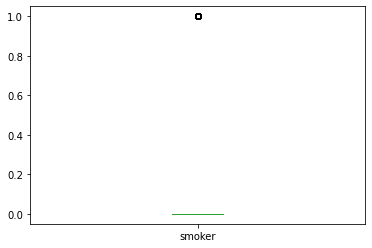

In [59]:
df['smoker'].plot.box()

<AxesSubplot:>

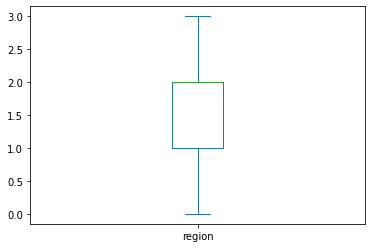

In [60]:
df['region'].plot.box()

<AxesSubplot:>

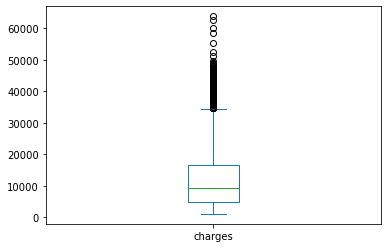

In [61]:
df['charges'].plot.box()

From the above observation , we can see that only the bmi and smoker columns have outliers

In [62]:
#Removal of Outliers ----> using zscore
df.shape

(1338, 7)

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [64]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [65]:
df_new_z.shape #data is reduced after removal of outliers

(1309, 7)

In [66]:
#Percentage of dataloss
data_loss=((1338-1309)/1338)*100
data_loss

2.167414050822123

from the above observation , we can see that data loss is in acceptable range i,e 2% data loss

In [67]:
#Seperating the columns into feature and target:
features=df.drop("charges",axis=1)
features

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [68]:
target=df["charges"]
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [69]:
#Scaling the data using min-max scaler :
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression


In [76]:
#Scaling the data using min-max scaler :
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
import warnings 
warnings.filterwarnings('ignore')
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"At random state{i}, the training accuracy is:{r2_score(target_train,pred_train)}")
    print(f"At random state{i}, the testing accuracy is :{r2_score(target_test,pred_test)}")
    print("\n")

At random state0, the training accuracy is:-0.8369738172231538
At random state0, the testing accuracy is :-0.5488702717513829


At random state1, the training accuracy is:-0.7966062065514095
At random state1, the testing accuracy is :-0.6819692013077745


At random state2, the training accuracy is:-0.7818470964803066
At random state2, the testing accuracy is :-0.7166821035423705


At random state3, the training accuracy is:-0.7810165520953318
At random state3, the testing accuracy is :-0.6689641351376094


At random state4, the training accuracy is:-0.787278974982055
At random state4, the testing accuracy is :-0.6168656943828759


At random state5, the training accuracy is:-0.8268123058456516
At random state5, the testing accuracy is :-0.5268672665122915


At random state6, the training accuracy is:-0.7637694933320696
At random state6, the testing accuracy is :-0.7065154116802443


At random state7, the training accuracy is:-0.7078171848474741
At random state7, the testing accuracy is 

In [73]:
feature_train,feature_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [77]:
#Train the model
lr.fit(feature_train,target_train)

LinearRegression()

In [78]:
pred_test=lr.predict(feature_test)

In [79]:
print(r2_score(target_test,pred_test))

-0.0169282836282012
